# Assignment 1 - Discrete Visualization

You are hired as a data scientist at International Trade Administration Industry and Analysis National Travel and Tourism Office, a national bureau dedicating to enhancing tourism in the United States, and get involved in the **International Visitation and Spending in the United States** project. Towards the end of a fiscal year, you received a request from the headquarter to obtain insights based on the given tourist visitation number for different states in the U.S. Specifically, you are asked to produce a Jupyter notebook with visualizations that can interact with the 3-year US international visitation data and engage a meeting with various stakeholders, including the headquarter of national travel and tourism in a high-profile video conference.

## Question 1 Load Data (25%)

Complete the function `load_data` below to load and organize the dataset that we will use in subsequent questions.  You should return a pandas Datafile with 5 columns titled “state”, “visitation_2016”, “visitation_2017”, “visitation_2018”, and “visitation_2019”.  The first column should contain a state and the subsequent columns the number of visitors in each corresponding year.

The following instructions will help you do that correctly:

* First import the `US_States_Visited_2017.xlsx`, `US_States_Visited_2018.xlsx` and `US_States_Visited_2019.xlsx` datasets. The three datasets are located at the assets folder. You may start with `read_excel()` function in pandas and remove the top and bottom rows. In each file, some column should contain the state.  Subsequent columns include the number of visitors in two different years.   Note that some data is duplicated.   

* After that, pick out the relevant columns.  Note that you will need to multiply all the visitation numbers by 1,000. For example, in 2019, the recorded visitation for Alabama state was supposed to be 141,000 after multiplying 1,000. This must be applied for all 3 datasets.

* Finally, you should merge the 3 datasets together, and rename the merged dataset called `merged_US_states_visitation`. The merged dataset should retain only the census states called `state`, 2016 visitation data called `visitation_2016`, 2017 visitation data called `visitation_2017`, 2018 visitation data called `visitation_2018`and 2019 visitation data called `visitation_2019`. To avoid confusion, when we join the datasets, keep every states that ever has international visitation data. Finally, order the state names alphabetically. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from functools import reduce
import seaborn as sns

def load_data():
    
    path = "/home/jovyan/work/resources/assignment1/assets/"
    
    df17, df18, df19 = pd.read_excel(f'{path}US_States_Visited_2017.xlsx', header=None), pd.read_excel(f'{path}US_States_Visited_2018.xlsx', header=None), pd.read_excel(f'{path}US_States_Visited_2019.xlsx', header=None)
    
    df17 = df17.iloc[7 : 42]
    
    df17.rename(columns={0:'Rank',
                      1:'state',
                      2:'2016 Market Share',
                      3:'2016 Visitation',
                      4:'2017 Market Share',
                      5:'2017 Visitation',
                      6:'% change'}, inplace=True)
    df17['state'] = df17['state'].apply(lambda x: x.strip())
    
    df18 = df18.iloc[8 : 47]
    df18.rename(columns={0:'Rank',
                      1:'state',
                      2:'2018 Market Share',
                      3:'2018 Visitation',
                      4:'% change',
                      5:'2017 Market Share',
                      6:'2017 Visitation'}, inplace=True)
    df18['state'] = df18['state'].apply(lambda x: x.strip())
#     df18['2018 Visitation'] = df18['2018 Visitation'].apply(lambda x: np.round(x))

    
    df19 = df19.iloc[7 : 47]
    df19.rename(columns={0:'Rank',
                      1:'state',
                      2:'2019 Market Share',
                      3:'2019 Visitation',
                      4:'% change',
                      5:'2018 Market Share',
                      6:'2018 Visitation'}, inplace=True)
    df19['state'] = df19['state'].apply(lambda x: x.strip())


    

    
    
        
    keep_16 = df17[['state', '2016 Visitation']]
    keep_17 = df17[['state', '2017 Visitation']]
    keep_18 = df18[['state', '2018 Visitation']]
    keep_19 = df19[['state', '2019 Visitation']]
    
    dataframes = [keep_16, keep_17, keep_18, keep_19]
    merged_US_states_visitation = reduce(lambda left, right: pd.merge(left, right, on='state',
                                            how='outer'), dataframes)
    
    merged_US_states_visitation.rename(columns={
        '2016 Visitation' : 'visitation_2016',
        '2017 Visitation' : 'visitation_2017',
        '2018 Visitation' : 'visitation_2018',
        '2019 Visitation' : 'visitation_2019'
    }, inplace=True)


    
    merged_US_states_visitation.loc[:, merged_US_states_visitation.columns != 'state'] = merged_US_states_visitation.loc[:, merged_US_states_visitation.columns != 'state'] * 1000
    
    merged_US_states_visitation.sort_values('state', ascending=True, inplace=True)

    return merged_US_states_visitation
    
    # loads_data().head(25)



In [3]:
df = load_data()


In [4]:
assert round(df['visitation_2016'].mean(),1) == 1489649.3
assert round(df['visitation_2017'].mean(),1) == 1507142.9
assert round(df['visitation_2018'].mean(),1) == 1398576.5
assert round(df['visitation_2019'].mean(),1) == 1353375.0

In [5]:
# # run this code to validate your creation of the dataframe used for remainder of assignment #1
# # the two asserts immediately following verify format of dataframe contains the necessary elements
# df = load_data()
# assert df.index.size == 40
# # assert all(['visitation_' + str(year) in df.columns for year in [2016, 2017, 2018, 2019]])
# try:
#    assert df.iloc[0].name == 'Alabama'
# except:
#    assert df['state'].iloc[0] == 'Alabama'

# # OPTIONAL 
# # the below assets match instructor solution, but depending how you cleaned could be little different.
# # listing the assumptions you make when cleaning data can explain certian differences
# try:
#    assert df.loc['Iowa'].isnull().values.any() == True
# except:
#    assert df.iloc[12].isnull().values.any() == True
# try:
#    assert df.loc['Michigan'].isnull().values.any() == False
# except:
#    assert df.iloc[18].isnull().values.any() == False
# assert round(df['visitation_2016'].mean(),1) == 1489649.3
# assert round(df['visitation_2017'].mean(),1) == 1507142.9
# assert round(df['visitation_2018'].mean(),1) == 1398576.5
# assert round(df['visitation_2019'].mean(),1) == 1353375.0


## Question 2 Bar Chart (40%)

Make use of the merged data to complete the function `make_bar_chart` below. The elements requested by the management team for the first visualization are:
* Make 4 plots, each of which is a bar chart representing the total visitation (as y-axis) of each state (shown in x-axis) in year 2016, 2017, 2018 and 2019. Each plot should use the data for each year.
* Make the figures readable by adjusting the figure size, and specify the year of each plot using the title (e.g., A proper title of the plot using 2016 visitation data could be something like “Visitation data 2016”.)

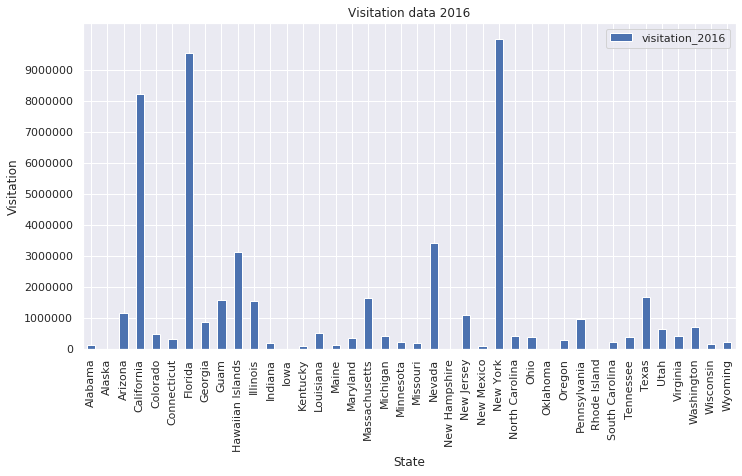

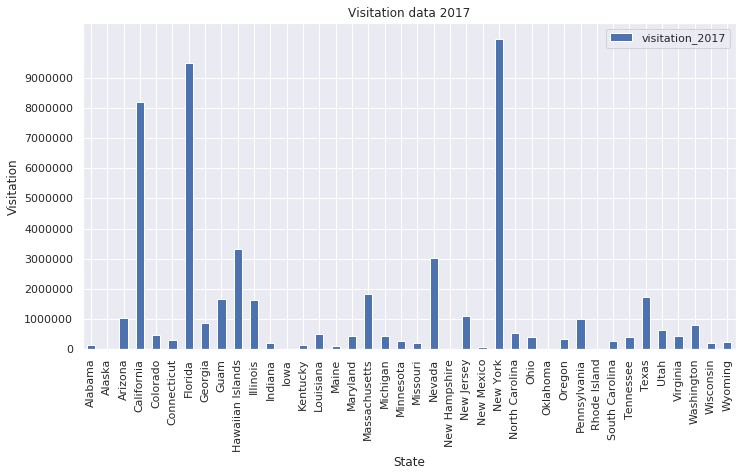

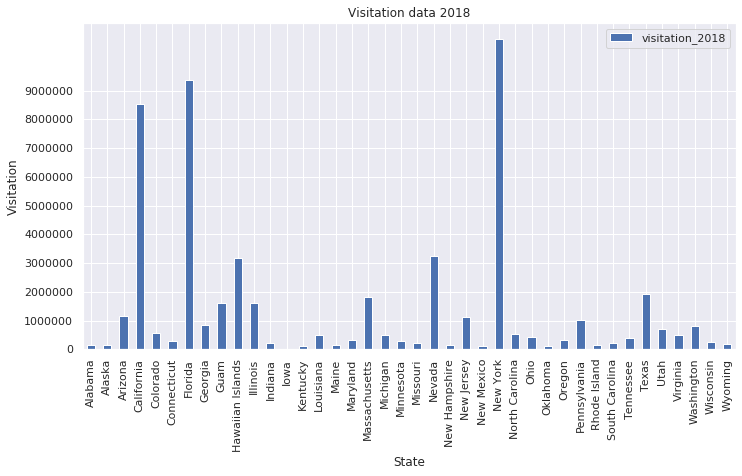

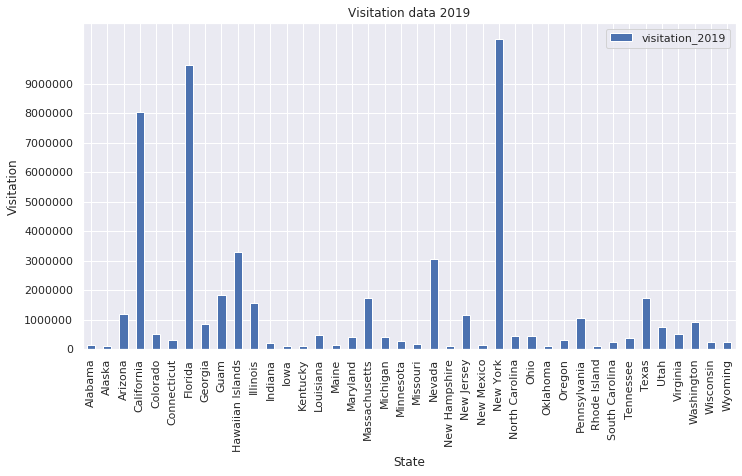

In [6]:
def make_bar_chart(data):
    sns.set(rc={'figure.figsize':(11.7,6)})

    fig2016 = data.plot(kind='bar', x='state', y='visitation_2016', title='Visitation data 2016',)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    
    fig2017 = data.plot(kind='bar', x='state', y='visitation_2017', title='Visitation data 2017')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    fig2018 = data.plot(kind='bar', x='state', y='visitation_2018', title='Visitation data 2018')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    fig2019 = data.plot(kind='bar', x='state', y='visitation_2019', title='Visitation data 2019')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    
    for figure in [fig2016, fig2017, fig2018, fig2019]:
        figure.set_xlabel('State')
        figure.set_ylabel('Visitation')
        figure.set_yticks(ticks=range(0, 10000000, 1000000))
    return plt.show([fig2016, fig2017, fig2018, fig2019])


make_bar_chart(load_data())

## Question 3 Transformation (35%)
After a week, the management team returned the report back to you can say "Hey! The visualization looks highly skewed. We could hardly see what is happening in the last few states." 

To better visualize the visitation data to the stakeholders, your manager told you a new requirement: perform **log-transformation** on the visitation number (please use log base 10) and make the same bar charts again and:

* Build the bar chart again with all visitation number log-transformed
* (Optional) If you want, you can annotate inside the graphs about the trend you observe in the new subplots. (E.g. In what way does log-transformation improve the visualizations?)

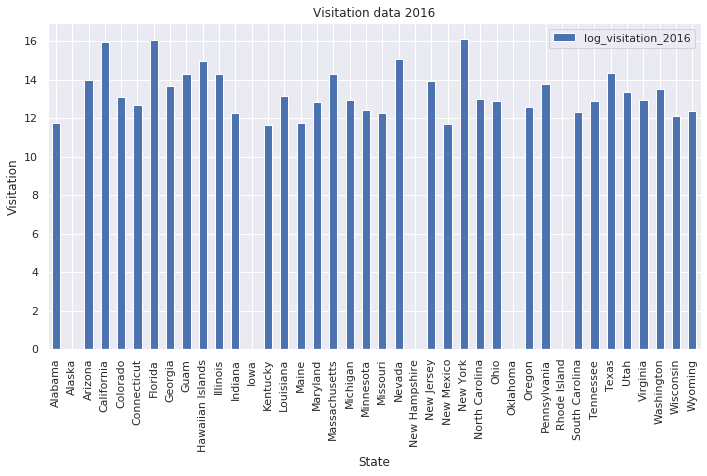

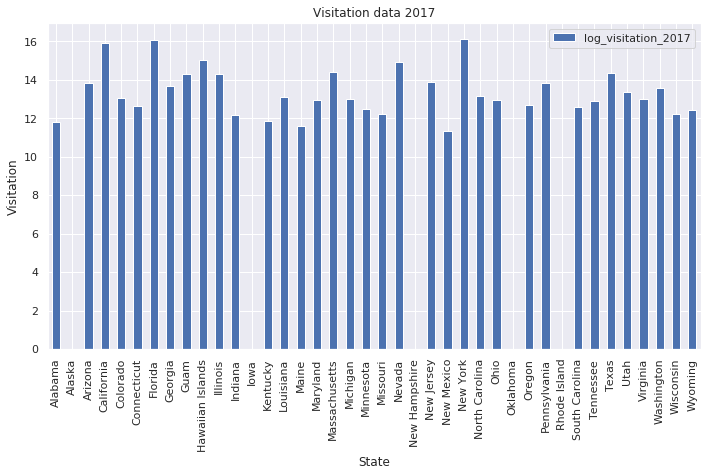

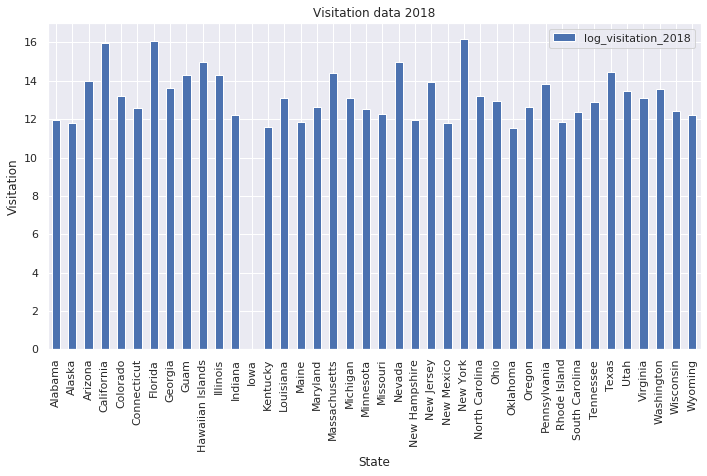

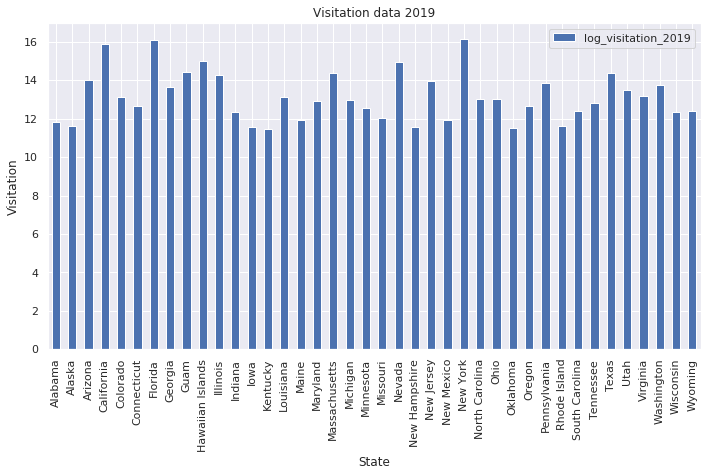

In [7]:
def make_transformed_bar_chart(data):   
    sns.set(rc={'figure.figsize':(11.7,6)})
    
    for column in data.columns[1:]:
        data[f"log_{column}"] = data[column].apply(lambda x: np.log(x))
    
    fig16 = data.plot(kind='bar', x='state', y='log_visitation_2016', title='Visitation data 2016')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    fig17 = data.plot(kind='bar', x='state', y='log_visitation_2017', title='Visitation data 2017')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    fig18 = data.plot(kind='bar', x='state', y='log_visitation_2018', title='Visitation data 2018')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

    fig19 = data.plot(kind='bar', x='state', y='log_visitation_2019', title='Visitation data 2019')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    
    for figure in [fig16, fig17, fig18, fig19]:
        figure.set_xlabel('State')
        figure.set_ylabel('Visitation')

    
    return plt.show([fig16, fig17, fig18, fig19])
make_transformed_bar_chart(load_data())

## Question 4 Zipf's Law on Visitation (Just for fun!)

Zipf's law is an empirical law originally proposed by a linguist George Kingsley Zipf to generalize word frequency. Zipf's law states that given a large text corpus with many vocabularies used, the frequency of any word is inversely proportional to its rank in the frequency table. There is a wikipedia page talking about his academic contribution: https://en.wikipedia.org/wiki/George_Kingsley_Zipf

For example, **the** is the most frequently occurring word which accounts for nearly 7% of all the words; the runner-up word is **of** which accounts for slightly over 3.5% of words, followed by **and** which accounts for around 2.8%. He observed these patterns and generalized that the $n^{th}$ most frequently occurring word has a frequency of $\frac{1}{n}$ proportional to the most popular word!

Now it's your turn! Do visitation numbers follow the Zipf's law? To answer this, you must make a plot by finishing the function `zipf_approximation_visitation` which 
* shows the bar chart of international tourist visitation in 2019 for each state sorted descending for the number (you’ve done a bar chart for 2019, now you just need to plot the 2019 visitation number by descending order)
* Overlay the Zipf's curve on the graph based on the inverse proportion relationship between visitation and rank (so you need to understand Zipf's law and calculate this)
* and finally annotate the image indicating whether or not the tourist visitation approximates the Zipf's law

In [8]:
def zipf_approximation_visitation(data):
    return None

zipf_approximation_visitation(load_data())